# Importing Libraries and DF .

In [13]:
import pandas as pd
import networkx as nx
import numpy as np


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/papers.csv')
df.columns

Index(['title', 'authors', 'year', 'venue', 'index', 'citations', 'abstract'], dtype='object')

In [16]:
df.head(4)

,title,authors,year,venue,index,citations,abstract
0,Automated Deduction in Geometry: 5th Internati...,"Hoon Hong,Dongming Wang",2006,NaN,0,NaN,NaN
1,A+ Certification Core Hardware (Text & Lab Man...,Charles J. Brooks,2003,NaN,1,NaN,NaN
2,Performance engineering in industry: current p...,"Ahmed E. Hassan,Parminder Flora",2007,Proceedings of the 6th international workshop ...,2,NaN,This panel session discusses performance engin...
3,"Dude, You Can Do It! How to Build a Sweeet PC","Darrel Creacy,Carlito Vicencio",2005,NaN,3,NaN,Whether you're frustrated with current PC offe...


In [17]:
type(df['year'][10])
# transfom the year column to int
df['year'] = df['year'].apply(lambda x: int(x) if x != '-1' else -1)

In [18]:
def display_for_index(index, ls_columns=None):
    if ls_columns:
        display(df[df['index'] == index][ls_columns])
    else:
        display(df[df['index'] == index])

In [19]:
display_for_index('3640')
df.loc[df['index'] == '3640', 'year'] = 2006
display_for_index('3640')

,title,authors,year,venue,index,citations,abstract


,title,authors,year,venue,index,citations,abstract


In [20]:
display_for_index('57929', ['title', 'year'])
df.loc[df['index'] == '57929', 'year'] = 2008
display_for_index('57929')

,title,year


,title,authors,year,venue,index,citations,abstract


In [21]:
df.drop(df[df['year'] == -1].index, inplace=True)


In [22]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 629805 entries, 0 to 629813
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      629805 non-null  object
 1   authors    603896 non-null  object
 2   year       629805 non-null  int64 
 3   venue      531218 non-null  object
 4   index      629805 non-null  int64 
 5   citations  125372 non-null  object
 6   abstract   281080 non-null  object
dtypes: int64(2), object(5)
memory usage: 38.4+ MB
None


In [23]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
title             0
authors       25909
year              0
venue         98587
index             0
citations    504433
abstract     348725
dtype: int64


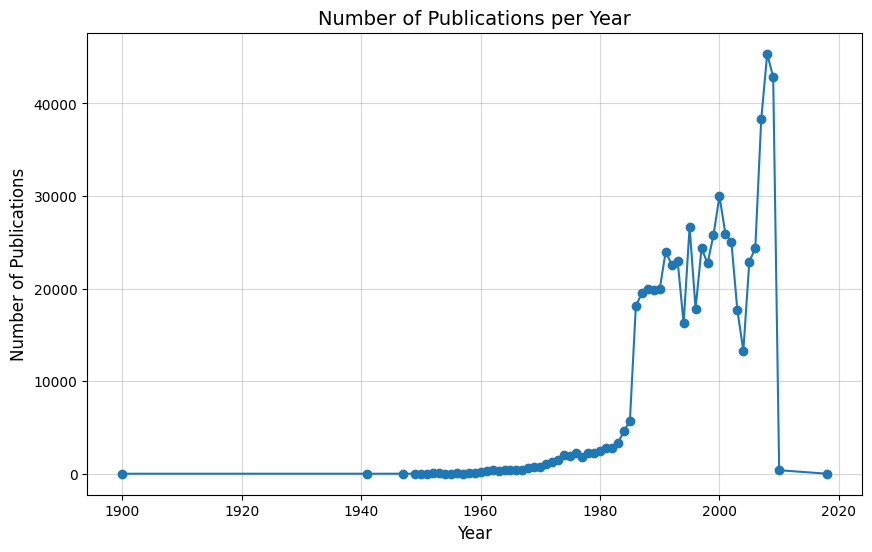

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume your dataset is in a DataFrame called `df` with a 'year' column
yearly_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('Number of Publications per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Publications', fontsize=12)
plt.grid(alpha=0.5)
plt.show()


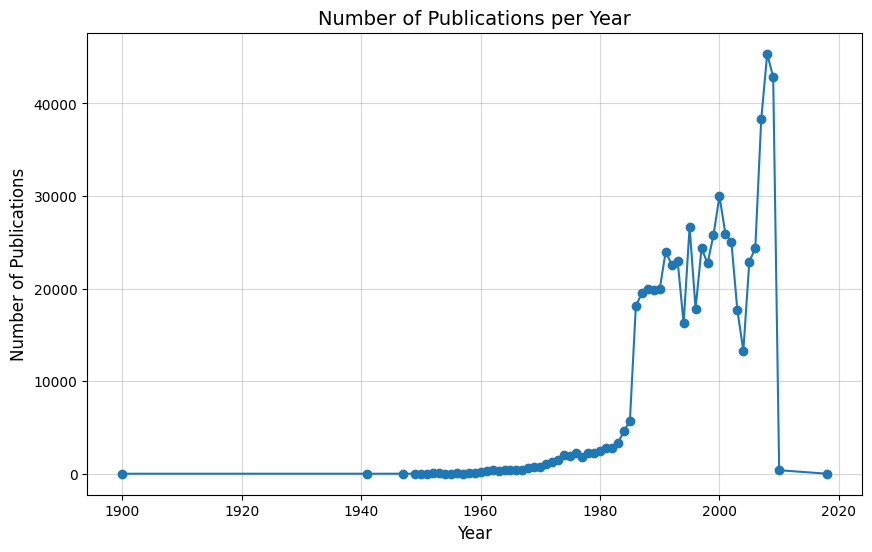

In [25]:

df_cleaned = df[df['year'] > 1800]
yearly_counts = df_cleaned['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')
plt.title('Number of Publications per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Publications', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [26]:
def aggregate_citations(citation):
    if isinstance(citation, list):
        return sum(citation)
    return citation

df['citations'] = df['citations'].apply(aggregate_citations)


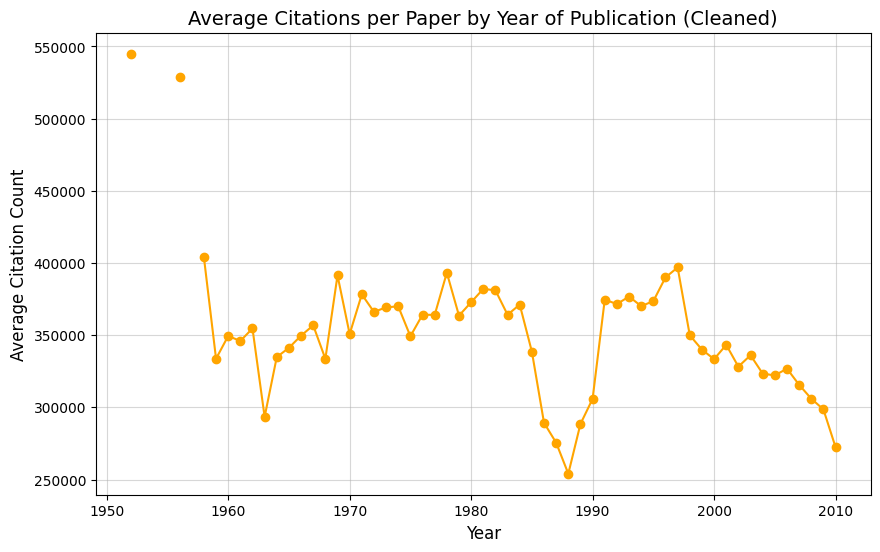

In [27]:
# In cell ipython-input-12-a7b2e42ae9c2
# Convert the 'citations' column to numeric before calculating the mean
citation_trends_cleaned = df_cleaned.groupby('year')['citations'].apply(lambda x: pd.to_numeric(x, errors='coerce').mean())

plt.figure(figsize=(10, 6))
plt.plot(citation_trends_cleaned.index, citation_trends_cleaned.values, marker='o', color='orange')
plt.title('Average Citations per Paper by Year of Publication (Cleaned)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Citation Count', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

# Topics from abstract

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab') # Download punkt_tab

# Preprocessing function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text.lower())  # Tokenize and lowercase
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to abstracts
df['cleaned_abstract'] = df['abstract'].fillna('').apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')  # Adjust thresholds
dtm = vectorizer.fit_transform(df['cleaned_abstract'])


In [37]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust `n_components` for the number of topics
lda.fit(dtm)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, 10)


Topic 0:
network algorithm problem performance time paper result number protocol data
Topic 1:
method algorithm model result image paper problem using based data
Topic 2:
data web book database application query user use information computer
Topic 3:
technology information software computer research service development paper study project
Topic 4:
model paper approach language design user process application based program


Topic 0:
network algorithm problem performance time paper result number protocol data
Topic 1:
method algorithm model result image paper problem using based data
Topic 2:
data web book database application query user use information computer
Topic 3:
technology information software computer research service development paper study project
Topic 4:
model paper approach language design user process based application program

In [38]:
# Get topic distributions for all documents
topic_distributions = lda.transform(dtm)

# Check the shape of the output
print(topic_distributions.shape)  # Should be (number of documents, number of topics)


(629805, 5)


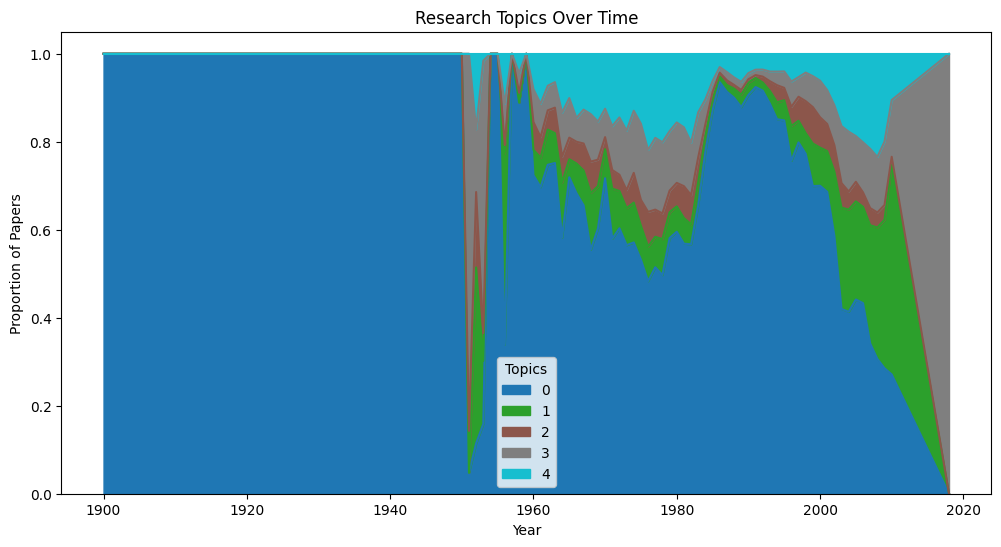

In [42]:
# Assuming `topic_distributions` contains LDA topic proportions for each paper
df['dominant_topic'] = topic_distributions.argmax(axis=1)
topic_trends = df.groupby(['year', 'dominant_topic']).size().unstack(fill_value=0)

# Normalize by year total for proportions
topic_trends_normalized = topic_trends.div(topic_trends.sum(axis=1), axis=0)

# Plot
topic_trends_normalized.plot(kind='area', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Research Topics Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Papers')
plt.legend(title='Topics')
plt.show()


The graph highlights the evolution of research themes over time.
* Topic 0 (Networking and Performance) dominated early research before the 1980s but declined as focus shifted to more complex, interdisciplinary areas. *
* Topic 1 (Methods and Algorithms) gained prominence from the 1980s, peaking in the 2000s, driven by advancements in machine learning and computational methods.
* Topic 2 (Data and Databases) emerged strongly after the 1990s, reflecting the rapid rise of internet technologies and database systems. Topic 3 (Technology and Software) maintained a consistent presence, underscoring its foundational role in research and development.
*Topic 4 (Models and Applications) has shown rapid growth in recent decades, highlighting the increasing focus on practical applications, modeling techniques, and programming frameworks.

## Visualize the most important words for each topic.

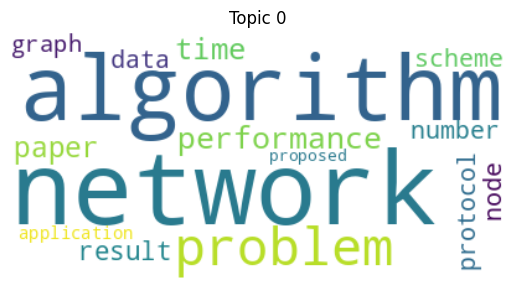

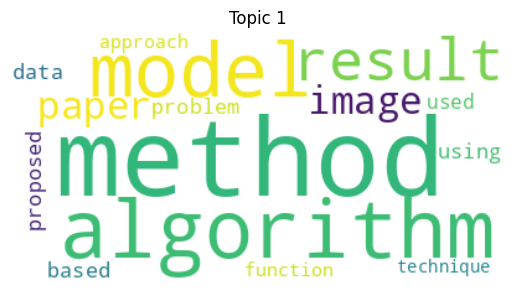

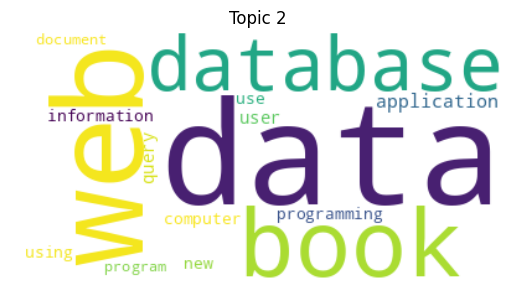

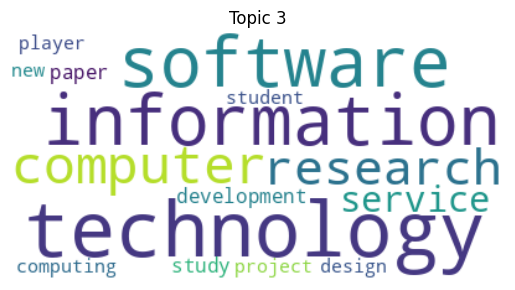

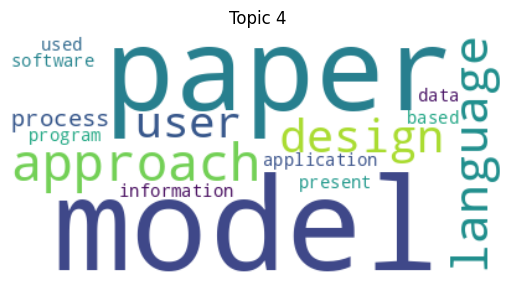

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_idx, topic in enumerate(lda.components_):
    word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[:-15 - 1:-1]}
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_idx}")
    plt.show()


In [47]:
df.columns

Index(['title', 'authors', 'year', 'venue', 'index', 'citations', 'abstract',
       'citation_count', 'cleaned_abstract', 'dominant_topic'],
      dtype='object')

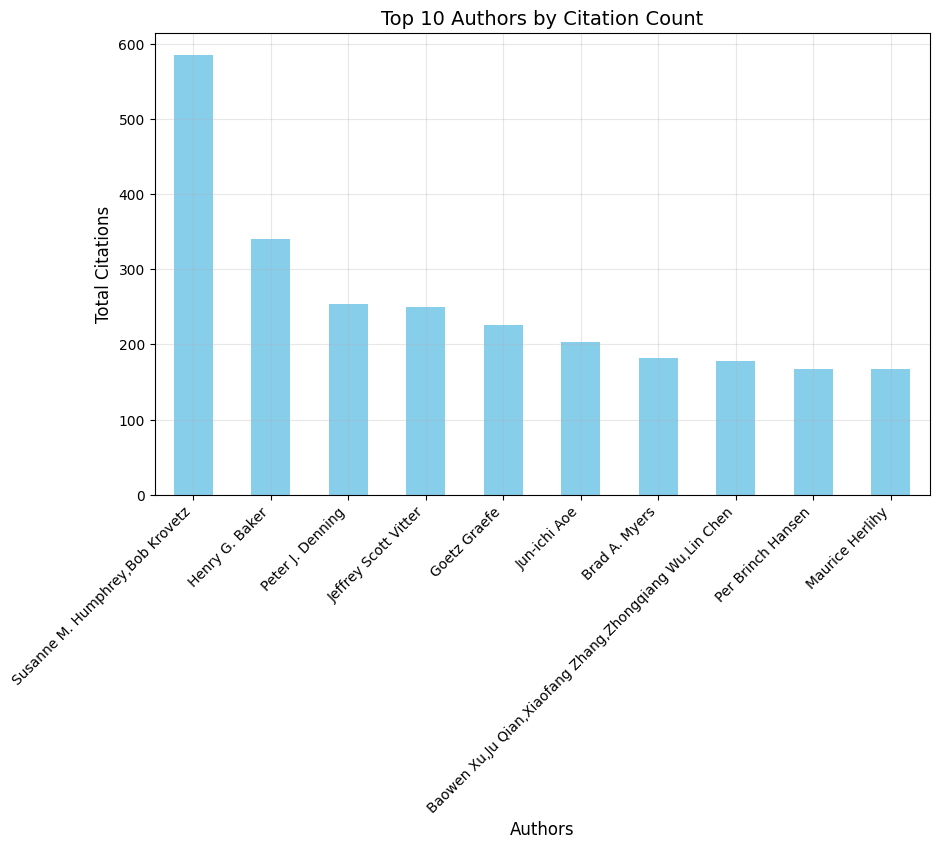

In [48]:
top_authors = df.explode('authors').groupby('authors')['citation_count'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top 10 Authors by Citation Count', fontsize=14)
plt.xlabel('Authors', fontsize=12)
plt.ylabel('Total Citations', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.show()
